# Example 2: Markov Stability applied to directed graph

In [1]:
import networkx as nx

from pygenstability import run, plotting, constructors

In [10]:
# creating directed partitioned graph

nx_graph = nx.planted_partition_graph(4, 20, 0.3, 0.01, seed=42, directed=True)
adjacency = nx.to_scipy_sparse_array(nx_graph)

In [11]:
# defining the constructor externally

directed_constructor = constructors.load_constructor('directed', adjacency, alpha=0.85)

In [12]:
# scan markov scale for communities

all_results = run(adjacency, min_scale=-1, max_scale = 1, constructor=directed_constructor)

Your graph is directed!
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 134.52it/s]


In [13]:
# plot interactive

_ = plotting.plot_scan(all_results, use_plotly=True)

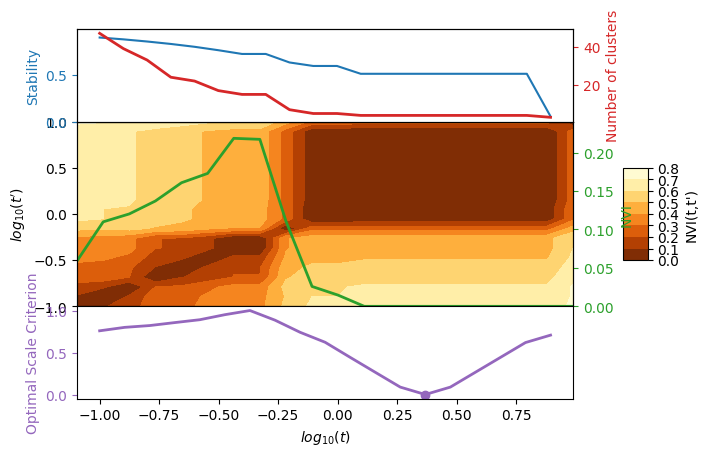

In [14]:
# plot matplotlib

_ = plotting.plot_scan(all_results, use_plotly=False)

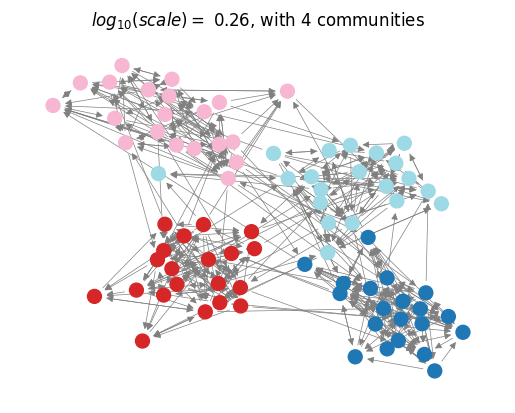

In [15]:
# plot partition at scale index t

pos = nx.spring_layout(nx_graph, weight=None, scale=1)
for u in nx_graph:
    nx_graph.nodes[u]["pos"] = pos[u]

t = 12;
plotting.plot_single_partition(nx_graph, all_results, t)


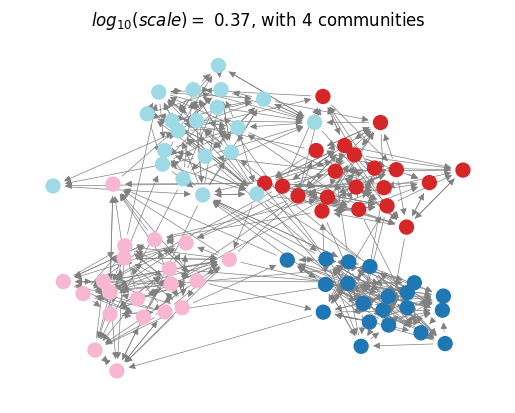

In [8]:
# plot optimal partitions
_ = plotting.plot_optimal_partitions(nx_graph, all_results)

In [9]:
# plotting partitions at all scales in './communities' folder

_ = plotting.plot_all_partitions(nx_graph, all_results)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:25<00:00,  4.28s/it]
